### Treina um modelo de rede neural para classificação de imagens de roupas, como tênis e camisetas

## Importando as bibliotecas necessárias

In [1]:
#TensforFlow e tf.keras
import tensorflow as tf
from tensorflow import keras

#Bibliotecas Auxiliares
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

/home/kelvin/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/kelvin/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/kelvin/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/kelvin/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: 

1.14.0


/home/kelvin/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/kelvin/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/kelvin/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/kelvin/.local/lib/python3.6/site-packages/tensorboard/compat/ten

## Importando a base de dados Fashion MNIST


In [2]:
fashion_mnist = keras.datasets.fashion_mnist
#Dados usados para aprender // dados usadas para testar
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

### Armazenando as labels

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Explorando os dados


In [4]:
#Quantidade de imagens / Tamanho em pixels (28x28)
train_images.shape

(60000, 28, 28)

In [5]:
#Quantidade de Labels no conkinto de treinamento
len(train_labels)

60000

In [6]:
#Cada label eh um inteiro entre 0 e 9
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [7]:
#10000 imagens no cojunto de testes, cada uma de tamanho 28x28 pixels
test_images.shape

(10000, 28, 28)

In [8]:
#E um conjunto de teste contendo 10000 labels das imagens
len(test_labels)

10000

## Reshape

### Necessário ao usar uma rede convolucional

In [9]:
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)
print(train_images.shape)

test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)
print(test_images.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


## Pré-processamento dos dados

### Os valores dos pixels nas imagens estão entre 0 e 255, portanto vamos escalar para o intervalo de 0 e 1.


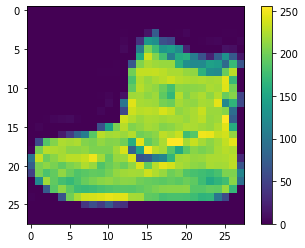

In [10]:
#Inspecionando a primeira imagem, por exemplo
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

#Dividindo os valores por 255, para escalar as imagens
train_images = train_images / 255.0
test_images = test_images / 255.0

### Verificando se os dados estão no formato correto. Mostrando as 25 primeiras imagens.

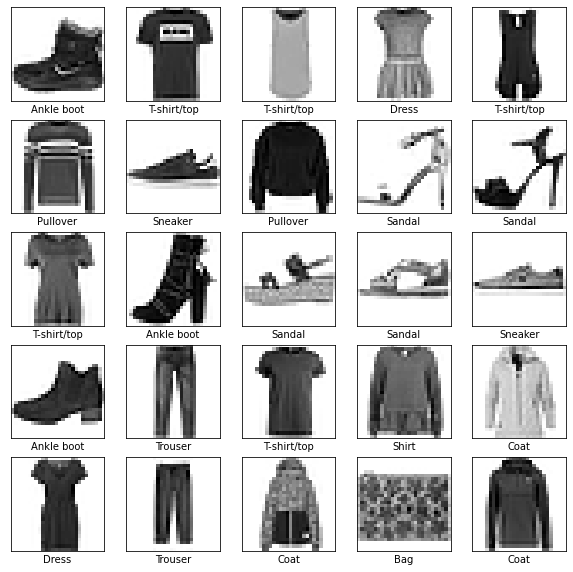

In [11]:
plt.figure(figsize=(10, 10))
for i in range(25):
    #Formatando cada subplot
    plt.subplot(5,5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Construção do modelo
### Construir a rede neural requer configurar as camadas do modelo, e depois, compilar o modelo

### Antes

In [12]:
'''
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])
'''

"\nmodel = keras.Sequential([\n    keras.layers.Flatten(input_shape=(28, 28)),\n    keras.layers.Dense(128, activation='relu'),\n    keras.layers.Dense(10, activation='softmax')\n])\n"

### Depois

In [13]:
model = keras.Sequential([
    keras.layers.Conv2D(28, (3,3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(28, (3,3), activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(28, (3,3), activation='relu'),
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


## Arquitetura do Modelo

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 28)        280       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 28)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 28)        7084      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 28)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 28)          7084      
_________________________________________________________________
flatten (Flatten)            (None, 252)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               3

### A primeira cada da rede, transforma o formato da imagem de um array de duas dimensões para um array de uma dimensão (de 28x28 para 28*28=784). Essa camada não tem parâmetros de aprendizagem, só de formatação dos dados.

### Depois dos pixels serem achatados, a rede consiste em mais duas camadas .Dense. A primeira contém 128 nós (ou neurônios). A segunda é uma .Softmax de 10 nós que retorna um array de 10 probabilidades, cuja soma resulta em 1. Cada nó contém um valor que indica a probabilidade de que aquela imagem pertence a uma das 10 classes.

## Compile o modelo

In [15]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

### Função Loss: Mede o quão precisa o modelo é durante o treinamento. Queremos minimizar a função para guiar o modelo para a direção certa.

### Optimizer: Isso é como o modelo se atualiza com base no valor dado que ele vê e sua função Loss.

### Métricas: Usadas para monitorar os passos de treinamento e teste. Nesse caso, utilizo acurácia.

## Treinando o modelo

### Passos para treinar o modelo:

### 1 - Alimentar os dados de treinamento (train_images e train_labels).
### 2 - O modelo aprende a associar as imagens as labels.
### 3 - Perguntamos ao modelo a respeito do conjunto de teste (array test_images). Verificando se as previsões combinaram com as labels do array test_labels

In [16]:
#epoch = Quantidade de iteracao sobre as amostras
#history = model.fit(train_images, train_labels, epochs=20)
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 14s 236us/sample - loss: 0.5255 - acc: 0.8070
Epoch 2/10
60000/60000 [==============================] - 14s 231us/sample - loss: 0.3441 - acc: 0.8743
Epoch 3/10
60000/60000 [==============================] - 14s 230us/sample - loss: 0.2963 - acc: 0.8902
Epoch 4/10
60000/60000 [==============================] - 14s 227us/sample - loss: 0.2703 - acc: 0.8995
Epoch 5/10
60000/60000 [==============================] - 14s 227us/sample - loss: 0.2516 - acc: 0.9060
Epoch 6/10
60000/60000 [==============================] - 13s 223us/sample - loss: 0.2349 - acc: 0.9123
Epoch 7/10
60000/60000 [==============================] - 15s 245us/sample - loss: 0.2211 - acc: 0.9177
Epoch 8/10
60000/60000 [==============================] - 16s 261us/sample - loss: 0.2073 - acc: 0.9221
Epoch 9/10
60000/60000 [==============================] - 15s 253us/sample - loss: 0.1959 - acc: 0.9268
Epoch 10/10
60000/60000 [==============================] - 15s 2

### A medida que o modelo treina, as métricas loss e acurácia são mostradas.

## Avaliando a Acurácia

In [17]:
#Verbose == a maneira de como desejo ver a saida da rede neural durante o treinamento
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('Teste Accuracy: %.10f' %(test_acc))

10000/10000 - 1s - loss: 0.2812 - acc: 0.9026
Teste Accuracy: 0.9025999904


### Acabou que o a acurácia com o conjunto de testes é um pouco menor do que a acurácia de treinamento. Essa diferença entre as duas acurácias representa um overfitting. 

### Overfitting é quando o modelo de aprendizado de máquina performou de maneira pior em um conjunto de entradas novas, e não usadas anteriormente, que usando o conjunto de treinamento.

## Predições

### Com o modelo treinado, usaremos para predições de algumas imagens

In [18]:
#Aqui o modelo previu qual label de cada imagem no conjunto de treinamento
predictions = model.predict(test_images)

#Vamos olhar a primeira predicao
print(predictions[0])

print("\nValor de predicao para cada uma das 10k de imagens")
print(predictions.shape)

[9.3811087e-12 3.8085765e-10 1.0097817e-12 3.6914746e-11 2.2855098e-11
 4.2181535e-05 1.8088218e-11 8.0404125e-06 5.7397087e-09 9.9994981e-01]

Valor de predicao para cada uma das 10k de imagens
(10000, 10)


### A predição é um array de 10 números, que representam a confiança do modelo em dizer qual label (no caso, tipos de roupa) é a respectiva imagem.

In [19]:
#Para ver qual o maior valor de cada predicao
print("Valor Maximo: %d " %(np.argmax(predictions[0])))

#Ou seja, uma bota
print("Classe correspondente: %s" %(class_names[np.argmax(predictions[0])]))

Valor Maximo: 9 
Classe correspondente: Ankle boot


## Criando a matriz de confusão

### Explorando os dados corretos e de predição

In [20]:
#Dados corretos
print(test_labels)

#Dados predictos
array_predicts = np.argmax(predictions, axis=1)
print(array_predicts)

[9 2 1 ... 8 1 5]
[9 2 1 ... 8 1 5]


#### Podemos ver que as três primeiras e três últimas predições estão corretas, comparando o vetor de labels e de predições.

### Bibliotecas utilizadas para o plot da matriz de confusão

In [21]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

In [22]:
predict_categories = tf.argmax(predictions, axis=1)
print(predict_categories)

Tensor("ArgMax:0", shape=(10000,), dtype=int64)


In [23]:
accuracy_score(test_labels, array_predicts)

0.9026

(<Figure size 720x720 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

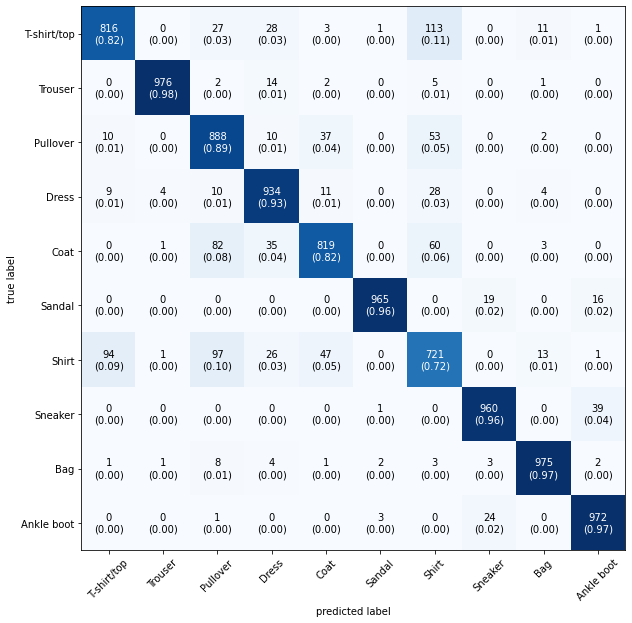

In [24]:
mat = confusion_matrix(test_labels, array_predicts)
#Matriz / Tamanho da figura / Nome das labels / Normalizacao
plot_confusion_matrix(conf_mat=mat, figsize=(10, 10), class_names=class_names, show_normed=True)

### Referências

### -> Material disponibilizado no AVA pela professora Karin.

### -> Tutorial CNN, Criando e classificando uma rede neural: https://www.tensorflow.org/tutorials/keras/classification?hl=pt-br

### -> Tutorial Para plotar a matriz de confusão: https://youtu.be/SToqP9V9y7Q

### -> Dentre outras pesquisas na web a respeito do assunto.

### -> Tutorial para adaptar para uma rede neural convolucional: https://www.tensorflow.org/tutorials/images/cnn